Análisis Exploratio de Datos

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv(r'movies_dataset.csv')

C:\Users\belen\AppData\Local\Temp\ipykernel_11460\3331169639.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'movies_dataset.csv')


Investigamos nuestra data

In [8]:
df.head(5)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
# Dimensión
df.shape

(45466, 24)

In [21]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [9]:
# Corroboramos tipo y valores nulos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Identificamos valores nulos

In [22]:
# Identificar valores nulos en cada columna
null_counts = df.isnull().sum()

# Determinar la cantidad de datos faltantes en cada columna
missing_data = pd.DataFrame({'Column': null_counts.index, 'Missing Values': null_counts.values})
missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)
missing_data

,Column,Missing Values
1,belongs_to_collection,40972
4,homepage,37684
19,tagline,25054
9,overview,954
11,poster_path,386
16,runtime,263
18,status,87
14,release_date,87
6,imdb_id,17
7,original_language,11


Proporción de valores nulos por cada variable

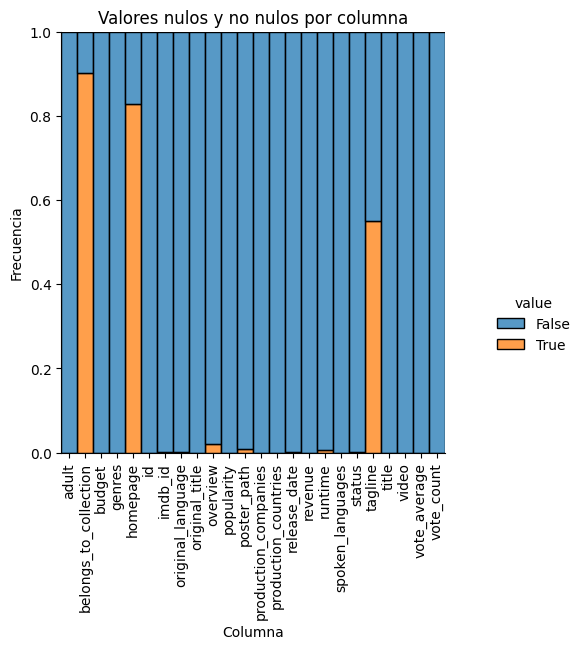

In [34]:
# Derretir el DataFrame para obtener una columna 'variable' y una columna 'value' que indica si el valor es nulo o no
melted_df = df.isnull().melt()

# Crear el gráfico de barras apiladas para visualizar los valores nulos y no nulos por columna
sns.displot(data=melted_df, x='variable', hue='value', multiple='fill')
plt.title('Valores nulos y no nulos por columna')
plt.xlabel('Columna')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


C:\Users\belen\AppData\Local\Temp\ipykernel_11460\4272839292.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numeric_columns].corr()


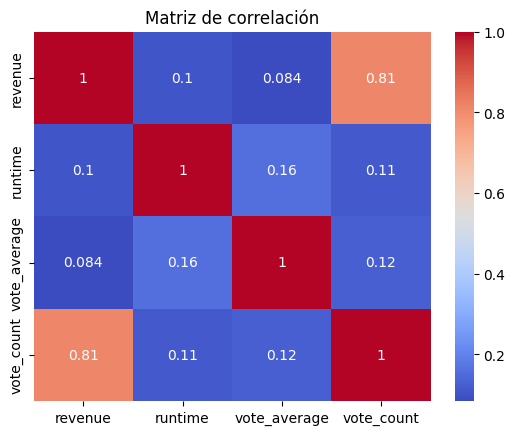

In [4]:
# Visualizar la correlación entre las variables numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Variables categoricas y numericas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
categorical_columns = ['adult', 'belongs_to_collection', 'genres', 'homepage', 'original_language', 'status']

In [5]:
import sweetviz as sv

c:\Users\belen\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')